In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [36]:
df = pd.read_csv("/kaggle/input/nifty50-stock-market-data/HDFC.csv")
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,HDFC,EQ,271.75,293.50,293.50,293.50,293.50,293.50,293.50,22744,6.675364e+11,NaN,NaN,NaN
1,2000-01-04,HDFC,EQ,293.50,317.00,317.00,297.00,304.00,304.05,303.62,255251,7.749972e+12,NaN,NaN,NaN
2,2000-01-05,HDFC,EQ,304.05,290.00,303.90,285.00,295.00,292.80,294.53,269087,7.925368e+12,NaN,NaN,NaN
3,2000-01-06,HDFC,EQ,292.80,301.00,314.00,295.00,296.00,296.45,300.14,305916,9.181669e+12,NaN,NaN,NaN
4,2000-01-07,HDFC,EQ,296.45,290.00,296.35,281.00,287.10,286.55,288.80,197039,5.690480e+12,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5199,2020-11-23,HDFC,EQ,2334.80,2344.20,2347.85,2230.10,2253.05,2250.80,2266.43,6995598,1.585502e+15,218301.0,3547873.0,0.5072
5200,2020-11-24,HDFC,EQ,2250.80,2272.25,2272.25,2209.55,2220.00,2217.70,2232.36,4945274,1.103962e+15,205979.0,2659204.0,0.5377
5201,2020-11-25,HDFC,EQ,2217.70,2228.00,2252.15,2179.30,2186.80,2191.35,2210.08,6150483,1.359307e+15,217608.0,3048448.0,0.4956
5202,2020-11-26,HDFC,EQ,2191.35,2197.15,2245.00,2187.65,2242.70,2238.40,2215.19,5026304,1.113421e+15,208269.0,2466256.0,0.4907


In [37]:
df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
5199,2020-11-23,HDFC,EQ,2334.80,2344.20,2347.85,2230.10,2253.05,2250.80,2266.43,6995598,1.585502e+15,218301.0,3547873.0,0.5072
5200,2020-11-24,HDFC,EQ,2250.80,2272.25,2272.25,2209.55,2220.00,2217.70,2232.36,4945274,1.103962e+15,205979.0,2659204.0,0.5377
5201,2020-11-25,HDFC,EQ,2217.70,2228.00,2252.15,2179.30,2186.80,2191.35,2210.08,6150483,1.359307e+15,217608.0,3048448.0,0.4956
5202,2020-11-26,HDFC,EQ,2191.35,2197.15,2245.00,2187.65,2242.70,2238.40,2215.19,5026304,1.113421e+15,208269.0,2466256.0,0.4907
5203,2020-11-27,HDFC,EQ,2238.40,2240.00,2272.45,2202.20,2238.00,2256.25,2239.94,10179511,2.280151e+15,213049.0,6246018.0,0.6136


In [38]:
df.shape

(5204, 15)

In [39]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [40]:
price = df[['Date','Close']]
price.head(10)

,Date,Close
0,2000-01-03,293.50
1,2000-01-04,304.05
2,2000-01-05,292.80
3,2000-01-06,296.45
4,2000-01-07,286.55
5,2000-01-10,287.20
6,2000-01-11,283.85
7,2000-01-12,285.60
8,2000-01-13,283.85
9,2000-01-14,286.55


In [41]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5204 entries, 0 to 5203
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5204 non-null   object 
 1   Close   5204 non-null   float64
dtypes: float64(1), object(1)
memory usage: 81.4+ KB


In [42]:
price.Date = pd.to_datetime(price.Date, format="%Y-%m-%d")
price = price[(price['Date'] > pd.Timestamp(2019,1,1))]
price.head()

,Date,Close
4730,2019-01-02,1980.65
4731,2019-01-03,1936.85
4732,2019-01-04,1972.60
4733,2019-01-07,1972.90
4734,2019-01-08,1958.95


In [43]:
price.tail()

,Date,Close
5199,2020-11-23,2250.80
5200,2020-11-24,2217.70
5201,2020-11-25,2191.35
5202,2020-11-26,2238.40
5203,2020-11-27,2256.25


In [44]:
price.shape

(474, 2)

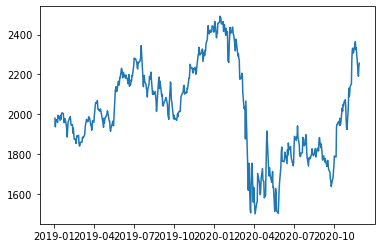

<Figure size 1008x864 with 0 Axes>

In [45]:
plt.plot(price.Date, price.Close)
plt.figure(figsize=(14,12))
plt.gcf().autofmt_xdate() 
plt.show()

<Figure size 4320x8640 with 0 Axes>

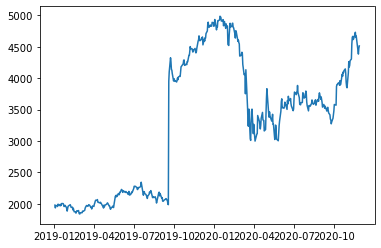

<Figure size 4320x8640 with 0 Axes>

In [46]:
#price.Close = price.Close.mask( price.Date >='2011-07-14', price.Close*5)
price.Close = price.Close.mask( price.Date >='2019-09-19', price.Close*2)

plt.plot(price.Date, price.Close)
plt.figure(figsize=(60,120))

In [47]:
price.head()

,Date,Close
4730,2019-01-02,1980.65
4731,2019-01-03,1936.85
4732,2019-01-04,1972.60
4733,2019-01-07,1972.90
4734,2019-01-08,1958.95


**Highest Profit that could have been made**

In [48]:
price['lowest_cumulative_price']=price.Close.cummin()
price['highest_profit']=price.Close-price['lowest_cumulative_price']
price.highest_profit.max()

3143.6000000000004

**Loss that could have been made**

In [49]:
price['highest_cumulative_price']=price.Close.cummax()
price['highest_loss']=price.Close-price['highest_cumulative_price']
price.highest_loss.min()

-1985.5000000000005